In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
PATH = '/Users/Rahul/Downloads/starcraft_player_data.csv'

df = pd.read_csv(PATH)
df.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


In [3]:
df.columns

Index(['GameID', 'LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM',
       'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'ComplexAbilitiesUsed'],
      dtype='object')

In [4]:
df.count()

GameID                  3395
LeagueIndex             3395
Age                     3395
HoursPerWeek            3395
TotalHours              3395
APM                     3395
SelectByHotkeys         3395
AssignToHotkeys         3395
UniqueHotkeys           3395
MinimapAttacks          3395
MinimapRightClicks      3395
NumberOfPACs            3395
GapBetweenPACs          3395
ActionLatency           3395
ActionsInPAC            3395
TotalMapExplored        3395
WorkersMade             3395
UniqueUnitsMade         3395
ComplexUnitsMade        3395
ComplexAbilitiesUsed    3395
dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Count'>

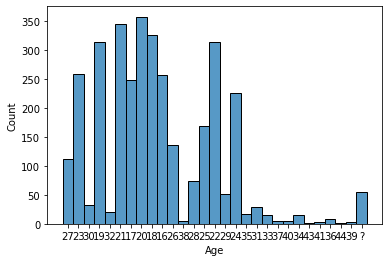

In [5]:
sns.histplot(data=df, x="Age")


In [6]:
#Looking at a histogram of age distribution, we see that not all values are ints. There is a value of ? that appears ~50 times.
#Next I look to see what columns ? appears in

In [7]:
df.columns[df.isin(['?']).any()]

Index(['Age', 'HoursPerWeek', 'TotalHours'], dtype='object')

In [52]:
#double check looking at dtypes, we see age, hoursperweek, and totalhours are objects instead of ints. Every other column seems to be proper.
df.dtypes

GameID                    int64
LeagueIndex               int64
Age                      object
HoursPerWeek             object
TotalHours               object
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

In [53]:
#The 3 non unique integer columns (Age, HoursPerWeek, and TotalHours) all contain null values represented as ? that will either need to be dropped or changed

In [54]:
missing_df = df[df.eq("?").any(axis=1)]

In [55]:
missing_df.shape

(57, 20)

In [56]:
df.shape

(3395, 20)

In [57]:
df['LeagueIndex'].value_counts()

4    811
5    806
6    621
3    553
2    347
1    167
8     55
7     35
Name: LeagueIndex, dtype: int64

In [58]:
missing_df['LeagueIndex'].value_counts()

8    55
5     2
Name: LeagueIndex, dtype: int64

In [59]:
#Only people in league 8 have missing value (minus 2 people in league 5), so we can't just delete the row or we would lose all people in row 8. 
#Based on the data, it seems that a ? means a uder is in tier 8, so we can set the ? to be an extremely high value to have our model always predict them as class 8. 
#Would need to understand where the data is really coming from to know if this is a guarentee that we can use. 

In [60]:
missing_df

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
358,1064,5,17,20,?,94.4724,0.003846,0.000783,3,0.000010,0.000135,0.004474,50.5455,54.9287,3.0972,31,0.000763,7,0.000106,0.000116
1841,5255,5,18,?,?,122.2470,0.006357,0.000433,3,0.000014,0.000257,0.003043,30.8929,62.2933,5.3822,23,0.001055,5,0.000000,0.000338
3340,10001,8,?,?,?,189.7404,0.004582,0.000655,4,0.000073,0.000618,0.006291,23.5130,32.5665,4.4451,25,0.002218,6,0.000000,0.000000
3341,10005,8,?,?,?,287.8128,0.029040,0.001041,9,0.000231,0.000656,0.005399,31.6416,36.1143,4.5893,34,0.001138,6,0.000058,0.000000
3342,10006,8,?,?,?,294.0996,0.029640,0.001076,6,0.000302,0.002374,0.006294,16.6393,36.8192,4.1850,26,0.000987,6,0.000000,0.000000
3343,10015,8,?,?,?,274.2552,0.018121,0.001264,8,0.000053,0.000975,0.007111,10.6419,24.3556,4.3870,28,0.001106,6,0.000000,0.000000
3344,10016,8,?,?,?,274.3404,0.023131,0.000739,8,0.000622,0.003552,0.005355,19.1568,36.3098,5.2811,28,0.000739,6,0.000000,0.000000
3345,10017,8,?,?,?,245.8188,0.010471,0.000841,10,0.000657,0.001314,0.005031,14.5518,36.7134,7.1943,33,0.001474,11,0.000040,0.000048
3346,10018,8,?,?,?,211.0722,0.013049,0.000940,10,0.000366,0.000909,0.003719,19.6169,38.9326,7.1320,23,0.000898,9,0.000000,0.000000
3347,10021,8,?,?,?,189.5778,0.007559,0.000487,10,0.000606,0.000566,0.005821,22.0317,36.7330,4.9050,28,0.000540,5,0.000000,0.000000


In [61]:
df = df.replace('?', 0)

In [62]:
df[['Age', 'HoursPerWeek', 'TotalHours']] = df[['Age', 'HoursPerWeek', 'TotalHours']].astype(int)

In [12]:
#Changing classes to be from 0-7 instead of 1-8 as some models need classes to start at 0. i.e XGBoost
df['LeagueIndex'] -= 1

In [16]:
df.drop(columns=['GameID'], inplace = True)

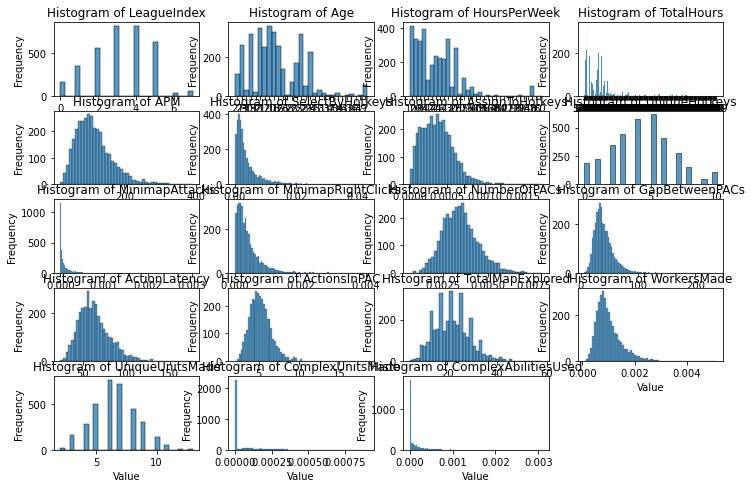

In [18]:
# Calculate the number of rows and columns for subplots
num_rows = (df.shape[1] + 1) // 2  # Round up to the nearest integer
num_cols = 4

# Create subplots with the specified number of rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 16))

# Flatten the axes array if necessary
axes = axes.flatten()

# Iterate over each column in the DataFrame
for i, column in enumerate(df.columns):
    # Create a histogram for the current column
    sns.histplot(data=df[column], ax=axes[i])
    
    # Set labels and title for the plot
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title('Histogram of {}'.format(column))

# Remove any unused subplots
if len(df.columns) < len(axes):
    for j in range(len(df.columns), len(axes)):
        fig.delaxes(axes[j])


# Display the subplots
plt.show()


<AxesSubplot:>

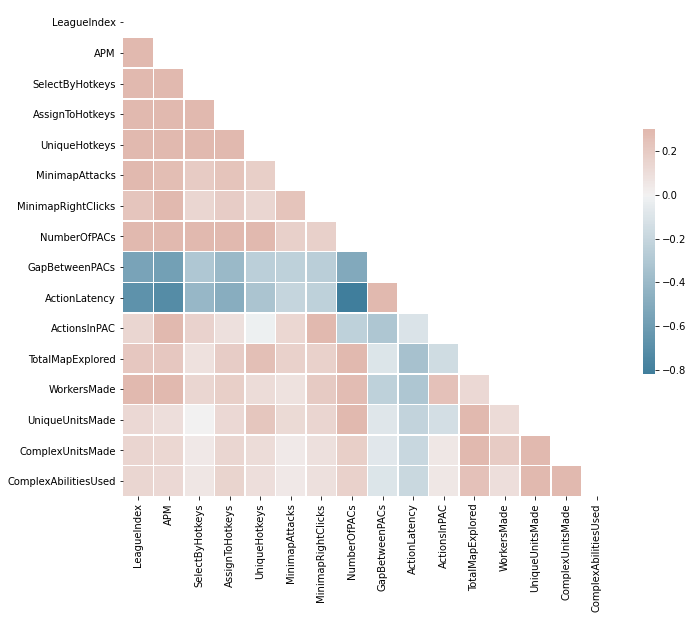

In [19]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Class=4, n=806 (23.741%)
Class=3, n=811 (23.888%)
Class=2, n=553 (16.289%)
Class=1, n=347 (10.221%)
Class=0, n=167 (4.919%)
Class=6, n=35 (1.031%)
Class=5, n=621 (18.292%)
Class=7, n=55 (1.620%)


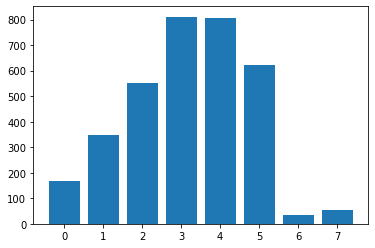

In [65]:
from collections import Counter
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()